In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1

#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | honningsvag
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | bonavista
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | siguiri
Processing Record 8 of Set 1 | juneau
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | tocopilla
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | ushuaia
Processi

Processing Record 36 of Set 4 | faridan
City not found. Skipping...
Processing Record 37 of Set 4 | san lawrenz
Processing Record 38 of Set 4 | hualmay
Processing Record 39 of Set 4 | rurrenabaque
Processing Record 40 of Set 4 | sovetsk
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | mentok
City not found. Skipping...
Processing Record 43 of Set 4 | hibbing
Processing Record 44 of Set 4 | la rioja
Processing Record 45 of Set 4 | eucaliptus
Processing Record 46 of Set 4 | kushiro
Processing Record 47 of Set 4 | atuona
Processing Record 48 of Set 4 | west wendover
Processing Record 49 of Set 4 | gamba
Processing Record 50 of Set 4 | moses lake
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | shillong
Processing Record 4 of Set 5 | sokoto
Processing Record 5 of Set 5 | el cope
Processing Record 6 of Set 5 | portales
Processing Record 7 of Set 5 | tabarq

Processing Record 23 of Set 8 | tommot
Processing Record 24 of Set 8 | maniitsoq
Processing Record 25 of Set 8 | surt
Processing Record 26 of Set 8 | atasu
Processing Record 27 of Set 8 | clyde river
Processing Record 28 of Set 8 | waipawa
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | sisimiut
Processing Record 31 of Set 8 | katherine
Processing Record 32 of Set 8 | rudnytsya
City not found. Skipping...
Processing Record 33 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 8 | necocli
Processing Record 35 of Set 8 | yauya
Processing Record 36 of Set 8 | san clemente
Processing Record 37 of Set 8 | pisek
Processing Record 38 of Set 8 | yantarnyy
Processing Record 39 of Set 8 | jibuti
Processing Record 40 of Set 8 | lulea
Processing Record 41 of Set 8 | nagato
Processing Record 42 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 8 | dawson creek
Processing Record 44 of Set 8 | bien hoa
Processing Record 45

Processing Record 14 of Set 12 | bogalusa
Processing Record 15 of Set 12 | magway
Processing Record 16 of Set 12 | novoagansk
Processing Record 17 of Set 12 | ambunti
Processing Record 18 of Set 12 | belyy yar
Processing Record 19 of Set 12 | kantunilkin
Processing Record 20 of Set 12 | vilhena
Processing Record 21 of Set 12 | rapid valley
Processing Record 22 of Set 12 | sola
Processing Record 23 of Set 12 | valle de juarez
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | vestmannaeyjar
Processing Record 27 of Set 12 | halifax
Processing Record 28 of Set 12 | vozhega
Processing Record 29 of Set 12 | natchez
Processing Record 30 of Set 12 | kokoda
Processing Record 31 of Set 12 | birao
Processing Record 32 of Set 12 | teguise
Processing Record 33 of Set 12 | pitimbu
Processing Record 34 of Set 12 | ganzhou
Processing Record 35 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 36 of Set 12 | ix

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Honningsvag,70.9821,25.9704,30.20,74,20,2.30,NO,2021-04-08 19:49:23
1,Bluff,-46.6000,168.3333,39.99,96,8,1.99,NZ,2021-04-08 19:49:24
2,Kavieng,-2.5744,150.7967,79.61,83,100,9.46,PG,2021-04-08 19:49:24
3,Barrow,71.2906,-156.7887,-16.60,63,75,8.05,US,2021-04-08 19:49:24
4,Bonavista,48.6499,-53.1147,42.80,100,52,5.75,CA,2021-04-08 19:45:36
5,Ancud,-41.8697,-73.8203,59.00,63,75,11.50,CL,2021-04-08 19:49:25
6,Siguiri,11.6667,-9.5000,91.92,8,1,3.36,GN,2021-04-08 19:49:25
7,Juneau,58.3019,-134.4197,32.00,86,90,35.68,US,2021-04-08 19:49:26
8,Rikitea,-23.1203,-134.9692,76.33,64,20,2.73,PF,2021-04-08 19:49:26
9,Bredasdorp,-34.5322,20.0403,55.40,94,7,3.44,ZA,2021-04-08 19:49:27


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Honningsvag,NO,2021-04-08 19:49:23,70.9821,25.9704,30.20,74,20,2.30
1,Bluff,NZ,2021-04-08 19:49:24,-46.6000,168.3333,39.99,96,8,1.99
2,Kavieng,PG,2021-04-08 19:49:24,-2.5744,150.7967,79.61,83,100,9.46
3,Barrow,US,2021-04-08 19:49:24,71.2906,-156.7887,-16.60,63,75,8.05
4,Bonavista,CA,2021-04-08 19:45:36,48.6499,-53.1147,42.80,100,52,5.75
5,Ancud,CL,2021-04-08 19:49:25,-41.8697,-73.8203,59.00,63,75,11.50
6,Siguiri,GN,2021-04-08 19:49:25,11.6667,-9.5000,91.92,8,1,3.36
7,Juneau,US,2021-04-08 19:49:26,58.3019,-134.4197,32.00,86,90,35.68
8,Rikitea,PF,2021-04-08 19:49:26,-23.1203,-134.9692,76.33,64,20,2.73
9,Bredasdorp,ZA,2021-04-08 19:49:27,-34.5322,20.0403,55.40,94,7,3.44


In [12]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

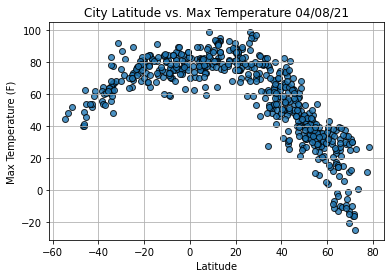

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

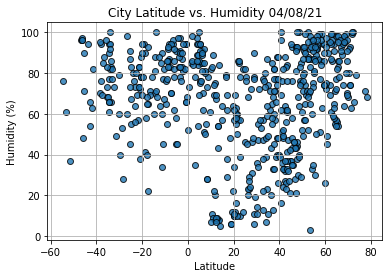

In [15]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig2.png")
#Show plot.
plt.show()

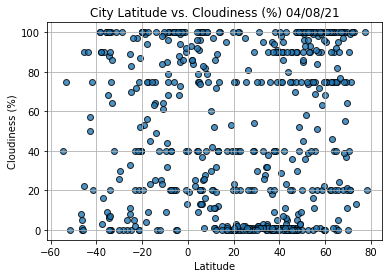

In [16]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig3.png")
#Show plot.
plt.show()

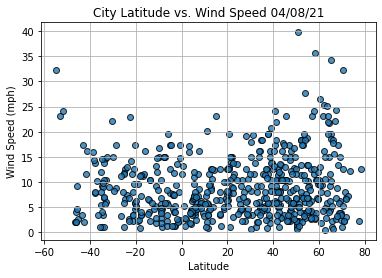

In [17]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure.
plt.savefig("weather_data/Fig4.png")
#Show plot.
plt.show()